In [14]:
%cd /content
!git clone https://github.com/rse4399/DataScience_Project
%cd DataScience_Project/data

/content
fatal: destination path 'DataScience_Project' already exists and is not an empty directory.
/content/DataScience_Project/data


In [15]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import metrics
from numpy import sqrt
from numpy import argmax
import numpy as np
import pandas as pd

In [16]:
#Load prepared csv

citibike_2019_final = "ds_citibike_2019_final.csv"

df = pd.read_csv(citibike_2019_final, index_col=None, header=0).dropna()
df = pd.get_dummies(df, drop_first=True)
df

,Year,Month,Day,Hour,start_counts,stop_counts,demand,docks,percent,max_temp,min_temp,temp,wind_chill,heat_index,precipitation,snow,snow_depth,wind_speed,wind_direction,wind_gust,visibility,cloud_cover,relative_humidity,risk,neighborhood_Central Brooklyn,neighborhood_Central Harlem,neighborhood_Chelsea and Clinton,neighborhood_East Harlem,neighborhood_East New York and New Lots,neighborhood_Flatbush,neighborhood_Gramercy Park and Murray Hill,neighborhood_Greenpoint,neighborhood_Greenwich Village and Soho,neighborhood_Inwood and Washington Heights,neighborhood_Long Island City,neighborhood_Lower East Side,neighborhood_Lower Manhattan,neighborhood_Northwest Brooklyn,neighborhood_Northwest Queens,neighborhood_Southern Brooklyn,neighborhood_Southwest Brooklyn,neighborhood_Southwest Queens,neighborhood_Sunset Park,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_West Central Queens,neighborhood_West Queens,neighborhood_West Side,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy",conditions_Snow,"conditions_Snow, Partially cloudy"
0,2019,1,1,0,1,1.0,0.0,2023.0,0.071862,48.70,48.70,48.70,47.90,0.0,0.15,0.0,0.0,3.40,110.0,0.00,6.60,52.90,96.620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019,1,1,1,6,4.0,2.0,2023.0,0.071862,49.80,49.80,49.80,48.30,0.0,0.03,0.0,0.0,4.60,271.0,0.00,9.60,52.90,95.790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2019,1,1,2,8,9.0,-1.0,2023.0,0.071862,50.00,50.00,50.00,47.80,0.0,0.03,0.0,0.0,5.80,259.0,0.00,8.60,52.70,95.690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019,1,1,3,5,4.0,1.0,2023.0,0.071862,51.20,51.20,51.20,0.00,0.0,0.00,0.0,0.0,9.20,279.0,0.00,6.10,52.90,99.730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2019,1,1,4,2,6.0,-4.0,2023.0,0.071862,50.10,50.10,50.10,0.00,0.0,0.01,0.0,0.0,13.90,270.0,17.20,3.10,52.50,95.710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187863,2019,12,31,19,4,7.0,-3.0,157.0,0.005577,39.06,39.06,39.06,28.70,0.0,0.00,0.0,0.0,21.94,31.8,18.30,10.52,52.58,80.428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
187864,2019,12,31,20,1,1.0,0.0,157.0,0.005577,38.98,38.98,38.98,28.36,0.0,0.00,0.0,0.0,22.80,31.7,16.58,10.83,52.57,78.887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
187865,2019,12,31,21,2,2.0,0.0,157.0,0.005577,38.90,38.90,38.90,28.02,0.0,0.00,0.0,0.0,23.66,31.6,14.86,11.14,52.56,77.346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
187866,2019,12,31,22,2,0.0,2.0,157.0,0.005577,38.82,38.82,38.82,27.68,0.0,0.00,0.0,0.0,24.52,31.5,13.14,11.45,52.55,75.805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [17]:
#Split training and testing data 80/20

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('risk',axis=1), 
                                                    df['risk'], test_size=0.2)

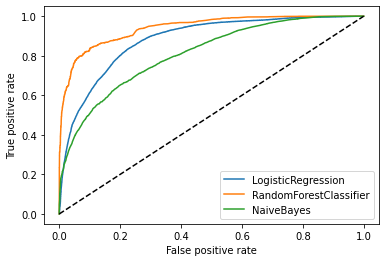

In [18]:
#LogisticRegression
lr_model=LogisticRegression(solver="liblinear",max_iter=10000)
lr_model.fit(X_train, Y_train)
lr_probs=lr_model.predict_proba(X_test)[:,1]
lr_fpr,lr_tpr,lr_thresholds=roc_curve(Y_test,lr_probs)
lr_avg_auc=np.mean(cross_val_score(lr_model, X_train, Y_train, cv=10, scoring="roc_auc", n_jobs=-1).mean())
plt.plot(lr_fpr,lr_tpr,label="LogisticRegression")

#RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10, max_depth=6, n_jobs=1)
rf_model.fit(X_train, Y_train)
rf_probs=rf_model.predict_proba(X_test)[:,1]
rf_fpr,rf_tpr,rf_thresholds=roc_curve(Y_test,rf_probs)
rf_avg_auc=np.mean(cross_val_score(rf_model, X_train, Y_train, cv=10, scoring="roc_auc", n_jobs=-1).mean())
plt.plot(rf_fpr,rf_tpr,label="RandomForestClassifier")

#NaiveBayes
nb_model=BernoulliNB()
nb_model.fit(X_train, Y_train)
nb_probs=nb_model.predict_proba(X_test)[:,1]
nb_fpr,nb_tpr,nb_thresholds=roc_curve(Y_test,nb_probs)
nb_avg_auc=np.mean(cross_val_score(nb_model, X_train, Y_train, cv=10, scoring="roc_auc", n_jobs=-1).mean())
plt.plot(nb_fpr,nb_tpr,label="NaiveBayes")

plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

In [19]:
#Find optimal Threshold for each model

#LogisticRegression
gmeans = sqrt(lr_tpr * (1-lr_fpr))
ix = argmax(gmeans)
print ( "LogisticRegression:")
print('Best Threshold=%f' % lr_thresholds[ix])

#RandomForestClassifier
gmeans = sqrt(rf_tpr * (1-rf_fpr))
ix = argmax(gmeans)
print ( "\nRandomForrestClassifer:")
print('Best Threshold=%f' % rf_thresholds[ix])

#NaiveBayes
gmeans = sqrt(nb_tpr * (1-nb_fpr))
ix = argmax(gmeans)
print ( "\nNaiveBayes:")
print('Best Threshold=%f' % nb_thresholds[ix])

LogisticRegression:
Best Threshold=0.251081

RandomForrestClassifer:
Best Threshold=0.366615

NaiveBayes:
Best Threshold=0.289999


In [20]:
# Build and print a confusion matrix

#LogisticRegression

prediction = lr_probs > lr_thresholds[ix]
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print ( "LogisticRegression:")
print (confusion_matrix)

#RandomForestClassifier
prediction = rf_probs > rf_thresholds[ix]
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print ( "\nRandomForrestClassifer:")
print (confusion_matrix)

#NaiveBayes
prediction = nb_probs > nb_thresholds[ix]
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print ( "\nNaiveBayes:")
print (confusion_matrix)

LogisticRegression:
      p      n
Y  3814    732
N  6974  26024

RandomForrestClassifer:
      p      n
Y  5986    318
N  4802  26438

NaiveBayes:
      p      n
Y  7658   6984
N  3130  19772


In [21]:
print ( "LogisticRegression:")
print ( "Accuracy on training = %.4f" % accuracy_score(lr_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(lr_model.predict(X_test), Y_test) )
print ( "Average AUC = "+str(lr_avg_auc))

print ( "\nRandomForrestClassifer:")
print ( "Accuracy on training = %.4f" % accuracy_score(rf_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(rf_model.predict(X_test), Y_test) )
print ( "Average AUC = "+str(rf_avg_auc))

print ( "\nNaiveBayes:")
print ( "Accuracy on training = %.4f" % accuracy_score(nb_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(nb_model.predict(X_test), Y_test) )
print ( "Average AUC = "+str(nb_avg_auc))


LogisticRegression:
Accuracy on training = 0.8139
Accuracy on test = 0.8169
Average AUC = 0.8784140137590842

RandomForrestClassifer:
Accuracy on training = 0.8840
Accuracy on test = 0.8842
Average AUC = 0.933823061577988

NaiveBayes:
Accuracy on training = 0.7862
Accuracy on test = 0.7897
Average AUC = 0.8060262560216908


RandomForrestClassifer is the best model for this dataset

In [22]:
#Extra
#Redo Model but droping Demand, start_counts (outgoing), and stop_counts (incoming)
#This model would better represent a forcasting application without live data to determine incoming, outgoing, and net demand

df = pd.read_csv(citibike_2019_final, index_col=None, header=0).dropna()
df=df.drop(columns="demand")
df=df.drop(columns="start_counts")
df=df.drop(columns="stop_counts")
df = pd.get_dummies(df, drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('risk',axis=1), 
                                                    df['risk'], test_size=0.2)

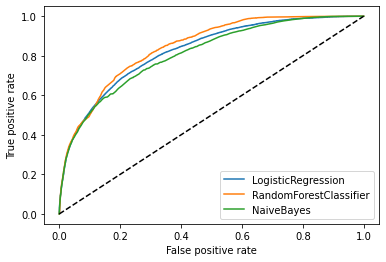

In [23]:
#LogisticRegression
lr_model=LogisticRegression(solver="liblinear",max_iter=10000)
lr_model.fit(X_train, Y_train)
lr_probs=lr_model.predict_proba(X_test)[:,1]
lr_fpr,lr_tpr,lr_thresholds=roc_curve(Y_test,lr_probs)
lr_avg_auc=np.mean(cross_val_score(lr_model, X_train, Y_train, cv=10, scoring="roc_auc", n_jobs=-1).mean())
plt.plot(lr_fpr,lr_tpr,label="LogisticRegression")

#RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10, max_depth=6, n_jobs=1)
rf_model.fit(X_train, Y_train)
rf_probs=rf_model.predict_proba(X_test)[:,1]
rf_fpr,rf_tpr,rf_thresholds=roc_curve(Y_test,rf_probs)
rf_avg_auc=np.mean(cross_val_score(rf_model, X_train, Y_train, cv=10, scoring="roc_auc", n_jobs=-1).mean())
plt.plot(rf_fpr,rf_tpr,label="RandomForestClassifier")

#NaiveBayes
nb_model=BernoulliNB()
nb_model.fit(X_train, Y_train)
nb_probs=nb_model.predict_proba(X_test)[:,1]
nb_fpr,nb_tpr,nb_thresholds=roc_curve(Y_test,nb_probs)
nb_avg_auc=np.mean(cross_val_score(nb_model, X_train, Y_train, cv=10, scoring="roc_auc", n_jobs=-1).mean())
plt.plot(nb_fpr,nb_tpr,label="NaiveBayes")

plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

In [24]:
#Find optimal Threshold for each model

#LogisticRegression
gmeans = sqrt(lr_tpr * (1-lr_fpr))
ix = argmax(gmeans)
print ( "LogisticRegression:")
print('Best Threshold=%f' % lr_thresholds[ix])

#RandomForestClassifier
gmeans = sqrt(rf_tpr * (1-rf_fpr))
ix = argmax(gmeans)
print ( "\nRandomForrestClassifer:")
print('Best Threshold=%f' % rf_thresholds[ix])

#NaiveBayes
gmeans = sqrt(nb_tpr * (1-nb_fpr))
ix = argmax(gmeans)
print ( "\nNaiveBayes:")
print('Best Threshold=%f' % nb_thresholds[ix])

LogisticRegression:
Best Threshold=0.289323

RandomForrestClassifer:
Best Threshold=0.271806

NaiveBayes:
Best Threshold=0.287123


In [25]:
# Build and print a confusion matrix


#LogisticRegression
prediction = lr_probs > lr_thresholds[ix]
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print ( "LogisticRegression:")
print (confusion_matrix)

#RandomForestClassifier
prediction = rf_probs > rf_thresholds[ix]
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print ( "\nRandomForrestClassifer:")
print (confusion_matrix)

#NaiveBayes
prediction = nb_probs > nb_thresholds[ix]
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print ( "\nNaiveBayes:")
print (confusion_matrix)

LogisticRegression:
      p      n
Y  2270    396
N  8568  26310

RandomForrestClassifer:
      p      n
Y  2724    479
N  8114  26227

NaiveBayes:
      p      n
Y  7781   7179
N  3057  19527


In [26]:
print ( "LogisticRegression:")
print ( "Accuracy on training = %.4f" % accuracy_score(lr_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(lr_model.predict(X_test), Y_test) )
print ( "Average AUC = "+str(lr_avg_auc))

print ( "\nRandomForrestClassifer:")
print ( "Accuracy on training = %.4f" % accuracy_score(rf_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(rf_model.predict(X_test), Y_test) )
print ( "Average AUC = "+str(rf_avg_auc))

print ( "\nNaiveBayes:")
print ( "Accuracy on training = %.4f" % accuracy_score(nb_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(nb_model.predict(X_test), Y_test) )
print ( "Average AUC = "+str(nb_avg_auc))

LogisticRegression:
Accuracy on training = 0.7893
Accuracy on test = 0.7913
Average AUC = 0.8232179662589368

RandomForrestClassifer:
Accuracy on training = 0.7923
Accuracy on test = 0.7942
Average AUC = 0.8435317767925538

NaiveBayes:
Accuracy on training = 0.7879
Accuracy on test = 0.7888
Average AUC = 0.8075872060137552


Random Forest Classifer still the best model, though its lead over LogisticRegression has decreased significantly